In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = np.arange(start,end,step)
y = weight*X + bias

In [15]:
print(X.shape)
print(y.shape)

(50,)
(50,)


In [16]:
X[:10],y[:10]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 array([0.3  , 0.314, 0.328, 0.342, 0.356, 0.37 , 0.384, 0.398, 0.412,
        0.426]))

In [17]:
split = int(0.8*len(X))
X_train, y_train = X[:split],y[:split]
X_test, y_test = X[split:],y[split:]

In [18]:
len(X_train),len(y_train)

(40, 40)

In [19]:
len(X_test),len(y_test)

(10, 10)

In [30]:
def plot_data(train_data=X_train,
              train_labels=y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = None
              ):
    plt.figure(figsize=(8,5))
    plt.scatter(train_data,train_labels, c='b',s=4,label='Training Data')
    plt.scatter(test_data,test_labels, c='g',s=4,label='Testing Data')
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r',s=4,label='Predictions')
    
    plt.legend(prop={"size":14});

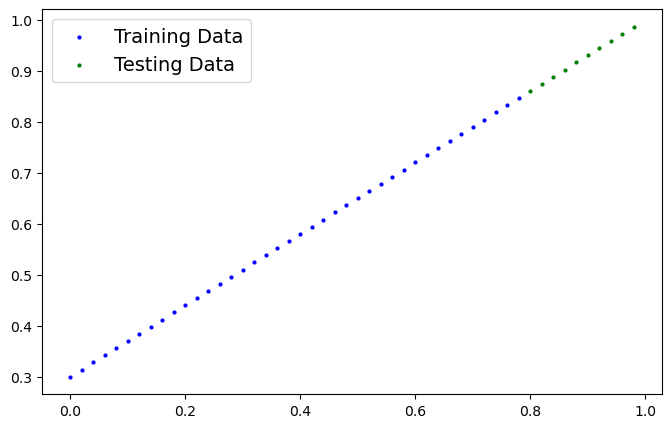

In [31]:
plot_data()

In [32]:
w = np.random.randn(1)
b = np.random.randn(1)
print(w,b)

[0.57993827] [0.50718401]


In [33]:
def loss_fn(y_actual,y_prediction):
    return np.sum(np.square((y_actual-y_prediction)))/len(y_actual)

In [38]:
alpha = 0.1
epochs = 300
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    y_pred = X_train*w + b
    
    train_loss = loss_fn(y_train,y_pred)
    train_loss_values.append(train_loss)
    
    graidentW = (-2*np.sum(((y_train-y_pred)*X_train)))/len(y_pred)
    graidentb = (-2*np.sum((y_train-y_pred)))/len(y_pred)
    
    w = w- alpha*graidentW
    b = b- alpha*graidentb
    
    test_pred = X_test*w + b
    test_loss = loss_fn(y_test,test_pred)
    test_loss_values.append(test_loss)
    
    if epoch%10 == 0:
        print(f"Epoch = {epoch} | Training Loss = {train_loss:.5f} | Test Loss = {test_loss:.5f}")

Epoch = 0 | Training Loss = 0.00095 | Test Loss = 0.00407
Epoch = 10 | Training Loss = 0.00079 | Test Loss = 0.00339
Epoch = 20 | Training Loss = 0.00066 | Test Loss = 0.00282
Epoch = 30 | Training Loss = 0.00055 | Test Loss = 0.00234
Epoch = 40 | Training Loss = 0.00045 | Test Loss = 0.00195
Epoch = 50 | Training Loss = 0.00038 | Test Loss = 0.00162
Epoch = 60 | Training Loss = 0.00031 | Test Loss = 0.00135
Epoch = 70 | Training Loss = 0.00026 | Test Loss = 0.00112
Epoch = 80 | Training Loss = 0.00022 | Test Loss = 0.00093
Epoch = 90 | Training Loss = 0.00018 | Test Loss = 0.00077
Epoch = 100 | Training Loss = 0.00015 | Test Loss = 0.00064
Epoch = 110 | Training Loss = 0.00012 | Test Loss = 0.00053
Epoch = 120 | Training Loss = 0.00010 | Test Loss = 0.00044
Epoch = 130 | Training Loss = 0.00009 | Test Loss = 0.00037
Epoch = 140 | Training Loss = 0.00007 | Test Loss = 0.00031
Epoch = 150 | Training Loss = 0.00006 | Test Loss = 0.00026
Epoch = 160 | Training Loss = 0.00005 | Test Loss =

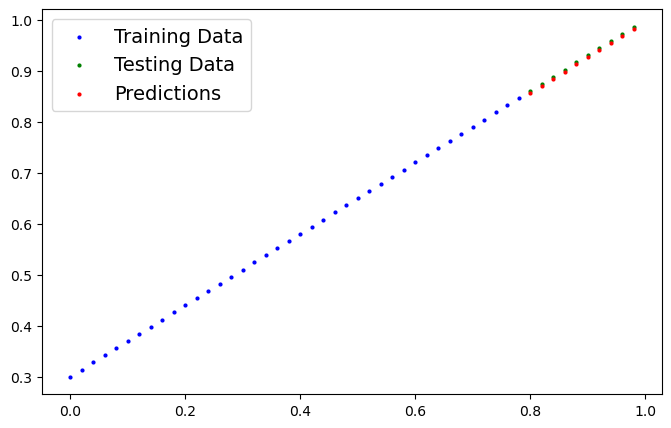

In [39]:
prediction = X_test*w + b
plot_data(predictions=prediction)

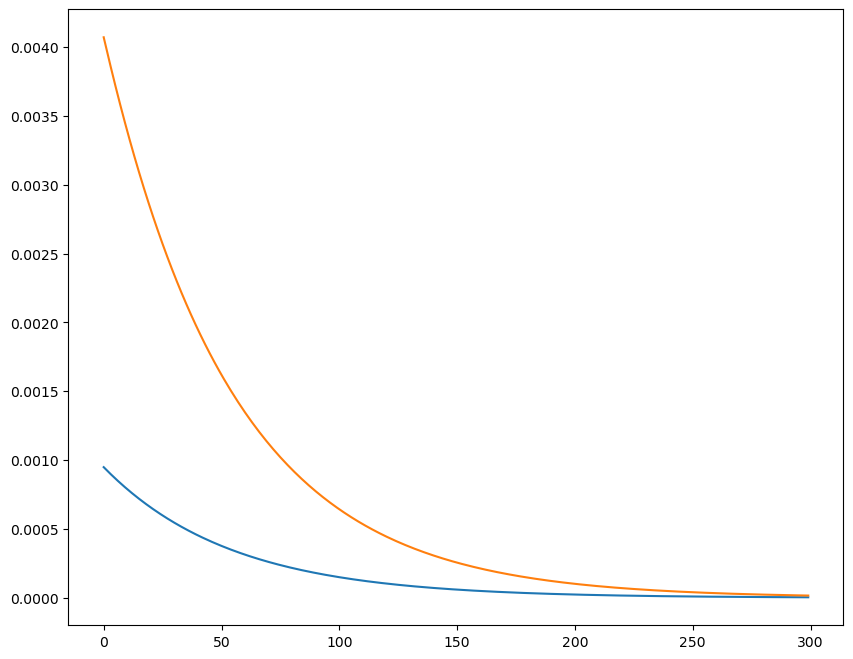

In [40]:
plt.figure(figsize=(10,8))
plt.plot(range(epochs),train_loss_values)
plt.plot(range(epochs),test_loss_values)
plt.show()